# Distributions and Basic Statistics

## *Workshop 7*  [![Open In Colab](https://github.com/oballinger/QM2/blob/main/colab-badge.png?raw=1)](https://colab.research.google.com/github/oballinger/QM2/blob/main/notebooks/W07.%20Distributions%20and%20Basic%20Statistics.ipynb)

For the rest of this course, we'll be working with data from the U.S. Census [Current Population Survey (CPS)](https://www.census.gov/programs-surveys/cps.html). 

### Aims:

- Choosing appropriate summary statistics for varying distributions

- Understanding:
    - The nature of our dataset, including potential bias
    - How to generate summary statistics for our dataset
    - The distribution of different variables
    - The intuition behind the Central Limit Theorem

## Getting Started

### First Things First: Bias
Once we've acquired a dataset, the first step is *always* to develop an understanding of where the data has come from. For this dataset, use the following [documentation page](https://www.census.gov/programs-surveys/cps/technical-documentation/methodology.html) to answer the questions below: 

1) What is the population of interest?
2) What was the sampling strategy?
3) What are potential sources of selection bias?

I'll start by importing the libraries I need: matplotlib (for graphs), pandas (for data), numpy (for maths) and random (for generating random numbers):

In [2]:
#This is a comment - python does not try to execute it

#This tells python to draw the graphs "inline" - in the notebook
%matplotlib inline  
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)


In [6]:
!mkdir data
!mkdir data/wk7
!curl https://storage.googleapis.com/qm2/wk7/cps.csv -o data/wk7/cps.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22.4M  100 22.4M    0     0   108M      0 --:--:-- --:--:-- --:--:--  107M


## 

The first thing to notice is that I'm using an **alias** for matplotlib.pyplot -  it's a bit ungainly, so I'm using "plt" in its place. That's just to make the coding easier. I'll do the same for some of the other libraries as we go through - this isn't necessary, but online examples frequently use "pd" for "pandas" (for example), so it can be useful to use these. The way it works is pretty simple - now I've used "plt" as my alias for matplotlib.pyplot, I can just say "plt.*command()*" whenever I need to use functions from that library.

Now that I've imported the libraries I'm going to be using, I'm ready to import the data: 

In [7]:
df=pd.read_csv('./data/wk7/cps.csv')
df.head()

,year,state,age,sex,race,sch,ind,union,incwage,realhrwage,occupation
0,1990,36,58,1,3,12.0,871,0.0,14200.0,12.269874,Office and Admin Support
1,2009,5,28,1,1,12.0,8660,1.0,17680.0,8.635149,Office and Admin Support
2,1990,36,37,1,1,14.0,380,1.0,28000.0,21.169851,.
3,1990,6,34,1,1,18.0,740,1.0,27500.0,20.447746,Computer and Math Technicians
4,1981,51,38,1,4,13.0,798,NaN,17000.0,18.892282,Managers


Our dataframe has 10 columns:

1. *year*: Survey year
2. *age*: the person's age
3. *sex*: the person's sex 
    * 1=male
    * 2=female
4. *race*: the person's race 
    * White non hispanic=1
    * Black non hispanic=2
    * Hispanic=3
    * Other non hispanic=4)
5. *sch*: Educational attainment
    * None = 0, 
    * Grades 1-12 = 1-12
    * Some University = 13, 
    * Associate's degree = 14, 
    * BA = 16
    * Advanced Degree = 18
6. *union*: Union membership 
    * N/A = 0, 
    * No union coverage = 1, 
    * Member of labor union=2, 
    * Covered by union but not a member=3
7. *incwage*: Wage and salary income
8. *realhrwage*: Real Hourly Wage
9. *occupation*: Occupation
10. *ind*: [industry code](https://www.census.gov/naics/?58967?yearbck=2002)

Based on the data 

## Summary Statistics

After thinking about the origins of our dataset and loading it into python, the next step is to generate summary statistics. This is vital for us to better understand our data. Pandas has a useful function, `describe`, which will generate summary statistics for all numerical variables in our entire dataframe:

In [8]:
df.describe()

,year,state,age,sex,race,sch,ind,union,incwage,realhrwage
count,344287.000000,344287.000000,344287.000000,344287.000000,344287.000000,344287.000000,344287.000000,301908.000000,3.442870e+05,344287.000000
mean,2002.599122,28.121004,41.734364,1.489057,1.570077,13.498057,4235.846009,0.221505,3.976170e+04,22.886629
std,10.831555,15.818556,10.415874,0.499881,0.952252,2.799038,3468.163157,0.499690,4.529758e+04,506.489695
min,1981.000000,1.000000,25.000000,1.000000,1.000000,0.000000,10.000000,0.000000,1.500000e+01,2.000000
25%,1990.000000,13.000000,33.000000,1.000000,1.000000,12.000000,760.000000,0.000000,1.670000e+04,11.723004
50%,2007.000000,28.000000,41.000000,1.000000,1.000000,13.000000,4270.000000,0.000000,3.000000e+04,17.698591
75%,2011.000000,41.000000,50.000000,2.000000,2.000000,16.000000,7860.000000,0.000000,5.000000e+04,26.442308
max,2013.000000,56.000000,64.000000,2.000000,4.000000,18.000000,9590.000000,3.000000,1.259999e+06,294610.968750


`describe` returns a dataframe with the same columns as the source dataframe. For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median. "incwage" is the annual income variable. Because values are generally in the tens of thousands, Python displays this using scientific notation (e.g. 3.442870e+05). This is pretty ugly, so let's create a new variable called "income" which divides that number by 1000 to make it more manageable:

In [24]:
df['income']=df['incwage']/1000
print(df['income'])

20        57.0
32        62.0
34        45.0
36        28.0
37        42.5
          ... 
344269    23.0
344271    25.0
344278    45.0
344281    23.0
344286    15.0
Name: income, Length: 53790, dtype: float64



### Exercise
Given these summary statistics, answer the following questions: 

1. what is the median hourly wage?
2. what is the average age?
3. are there more men or women?
4. intepret the mean of the "race" column. 


The answer to the last question should provoke some futher thought; the race column is categorical, but because it contains numbers it's being treated as numerical. The mean of a categorical variable is meaningless; For object data (e.g. categories, strings or timestamps), the result’s index will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency. Timestamps also include the first and last items.

Let's convert the race column from a numerical variable into a categorical one, and try `describe` once again:

In [9]:
df.dtypes

year            int64
state           int64
age             int64
sex             int64
race            int64
sch           float64
ind             int64
union         float64
incwage       float64
realhrwage    float64
occupation     object
dtype: object

In [10]:
df['race']=df['race'].astype('category')
df['race'].describe()

count     344287
unique         4
top            1
freq      240382
Name: race, dtype: int64

what other variables are categorical? Convert them to categorical and describe. What is the most common occupation in this dataset?

In [ ]:
# convert the variables to categorical and describe

These statistics are useful, but suppose we want detailed counts of the number of individuals in each category; For this, we can use the `groupby` function, with the `.size()` operator which simply counts the number of rows in each category. 

In [11]:
occupations= df.groupby('occupation').size()
occupations.sort_values(ascending=False)

occupation
.                                         132708
Office and Admin Support                   50635
Managers                                   35696
Consruction, Extraction, Installation      30579
Production                                 29732
Transportation and materials moving        21277
Computer and Math Technicians               8602
Protective Service adj_occupations          7809
financial Operators                         7702
Business Operators                          7327
Community and Social Workers                6025
Lawyers, Judges,Physicans and dentists      3835
Farming, Fishing & Forestry                 2360
dtype: int64

What is the most common profession? 


# Distributions

Now that we've cleaned our data up, let's have a closer look at the *distribution* of our data. The best way to do this is using a histogram. Let's start by looking at the distribution of the `income` variable:

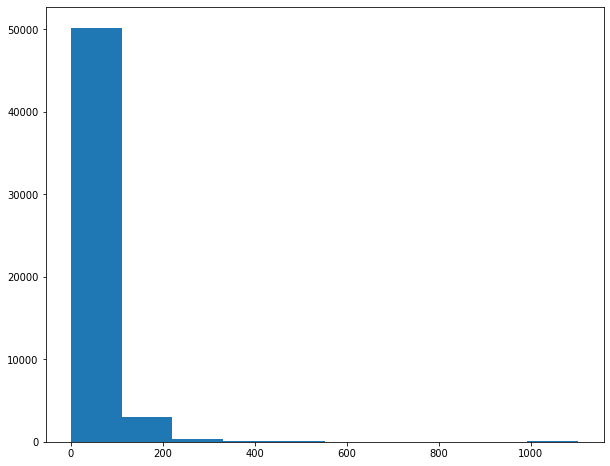

In [25]:
df=df[df['year']==2013]

plt.hist(df['income'])
plt.show()

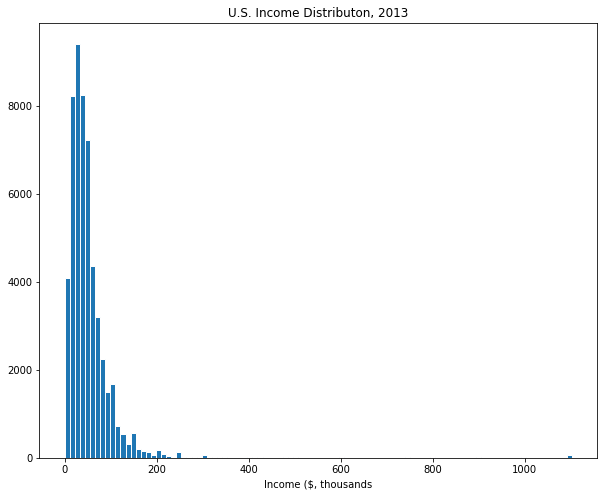

In [28]:
plt.hist(df['income'], bins=100, edgecolor='white')
plt.xlabel('Income ($, thousands')
plt.title("U.S. Income Distributon, 2013")

plt.show()

mean    51.821863
50%     40.000000
std     60.163449
Name: income, dtype: float64


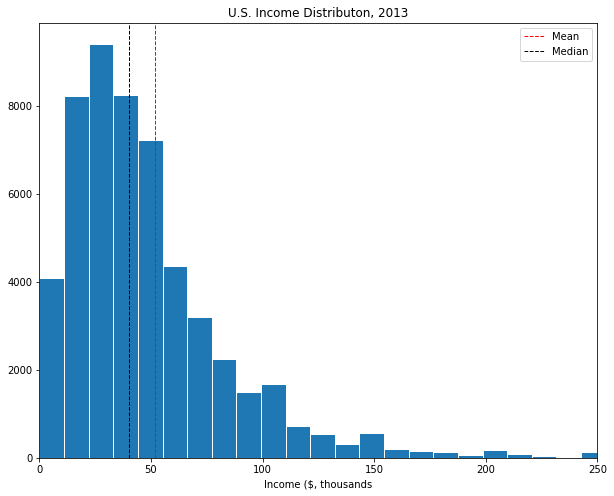

In [29]:
inc_summary=df['income'].describe()
print(inc_summary[['mean','50%','std']])

plt.hist(df['income'], bins=100, edgecolor='white')
plt.axvline(inc_summary['mean'], color='red', linestyle='dashed', linewidth=1,label='Mean')
plt.axvline(inc_summary['50%'], color='black', linestyle='dashed', linewidth=1, label='Median')

plt.legend()
plt.xlabel('Income ($, thousands')
plt.title("U.S. Income Distributon, 2013")
plt.xlim(0,250)
plt.show()

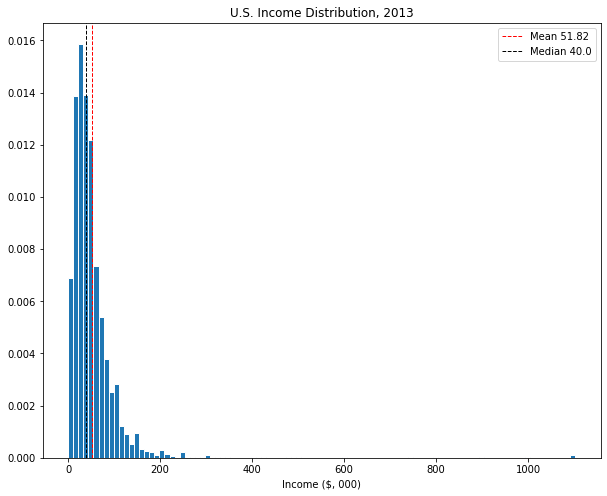

In [30]:
def plot_histogram(variable, bins, xlab, title):
	summary=variable.describe()
	plt.hist(variable, bins=bins,edgecolor='white', density=True)
	plt.axvline(summary['mean'], color='red', linestyle='dashed', linewidth=1,label='Mean '+str(round(summary['mean'],2)))
	plt.axvline(summary['50%'], color='black', linestyle='dashed', linewidth=1, label='Median '+str(round(summary['50%'],2)))

	plt.legend()
	plt.xlabel(xlab)
	plt.title(title)
	plt.show()

plot_histogram(df['income'], bins=100, xlab='Income ($, 000)',title='U.S. Income Distribution, 2013')

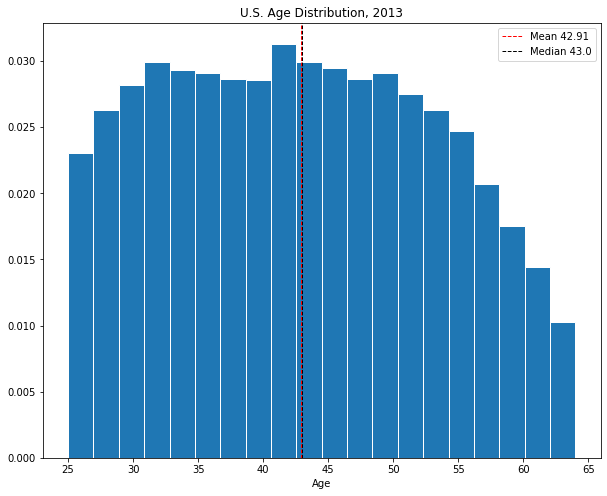

In [31]:
plot_histogram(df['age'], bins=20, xlab='Age',title='U.S. Age Distribution, 2013')

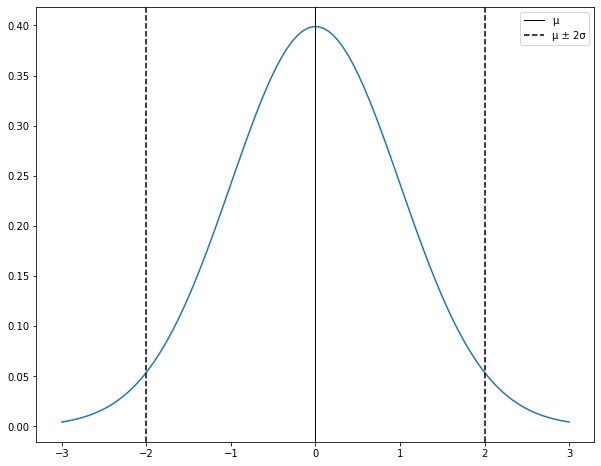

In [32]:
mu, se= 0, 1
x = np.linspace(mu - 3*se, mu + 3*se, 100)
plt.plot(x, norm.pdf(x, mu, se))
plt.axvline(mu, color='black', linestyle='solid', linewidth=1,label='µ')
plt.axvline(mu-se*2, color='black', linestyle='dashed', linewidth=1.5,label='µ ± 2σ')
plt.axvline(mu+se*2, color='black', linestyle='dashed', linewidth=1.5)
plt.legend()
plt.show()

In [33]:
def plot_sample_means(var, xlab, sample_size):

    #create an empty list to store sample means
    sample_means=[]

    # loop 10,000 times.
    for i in range(0,10000):
        # for each iteration, draw a sample of the size specified by the "sample_size" parameter
        sample=var.sample(sample_size, replace=True)
        # calculate the mean, and append it to the list of sample means. 
        sample_mean=sample.mean()
        sample_means.append(sample_mean)
    
    # now, plot a histogram 
    plt.hist(sample_means, bins=int(30), color= 'green', edgecolor='white', density=True)
    
    # fit a normal distribution to the data 
    mu, se = norm.fit(sample_means)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, se) 
    plt.plot(x, p, 'k', linewidth=2)

    # calculate the difference between the mean of the sample means 
    diff=abs(mu-var.mean())
    
    # add droplines, labels, title, legend, and limit the x-axis range to 3 standard deviations from the mean on either side.
    plt.axvline(mu, color='black', linestyle='dashed', linewidth=1,label='µx̄ - µ= '+str(round(diff, 3)))
    plt.axvline(mu-se*2, color='black', linestyle='dashed', linewidth=1.5,label='µ ± 2σ')
    plt.axvline(mu+se*2, color='black', linestyle='dashed', linewidth=1.5)
    plt.legend()
    plt.xlabel(xlab)	
    plt.title('Distribution of Sample Means (n={})'.format(sample_size))
    plt.xlim(mu-se*3, mu+se*3)
    plt.show()	

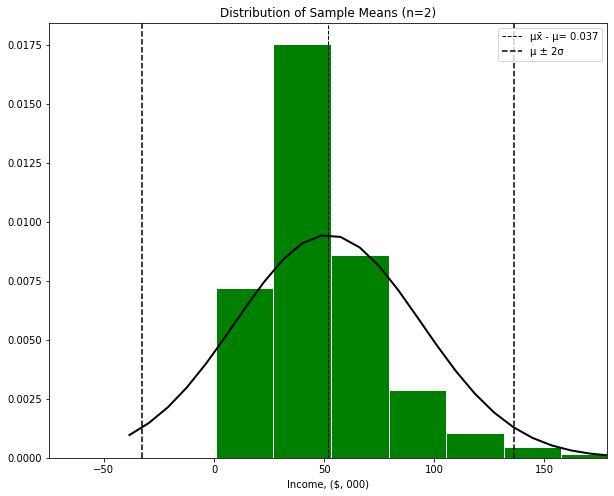

In [34]:
plot_sample_means(df['income'], xlab='Income, ($, 000)', sample_size=2)

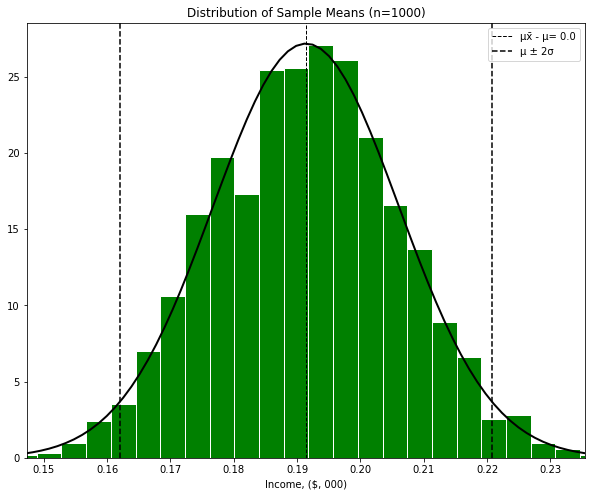

In [35]:
plot_sample_means(df['union'], xlab='Income, ($, 000)', sample_size=1000)

In [41]:
def two_hist(groups,group_labs,xlab, title):

		plt.figure(figsize=(15,6))

		it=-1
		for var in groups:
			it+=1
			sample_size=1000
			sample_means=[]
			iterations=10000

			for i in range(0,iterations):
				sample=var.sample(sample_size, replace=True)
				sample_mean=sample.mean()
				sample_means.append(sample_mean)
			
			plt.hist(sample_means, bins=int(iterations/300),edgecolor='white',density=True, label=group_labs[it])
			mu, std = norm.fit(sample_means)
			xmin, xmax = plt.xlim()
			x = np.linspace(xmin, xmax, 100)
			p = norm.pdf(x, mu, std) 

			diff=abs(mu-var.mean())
			plt.plot(x, p, 'k', linewidth=2)

			plt.xlabel(xlab)	
			plt.title(title)
			
			#plt.xlim(mu-std*3, mu+std*3)
			plt.axvline(var.mean(), color='red', linestyle='solid', linewidth=2)
			#plt.axvline(mu-std*1, color='black', linestyle='dotted', linewidth=1.5,label='µ ± 1σ')
			#plt.axvline(mu+std*1, color='black', linestyle='dotted', linewidth=1.5)
			#plt.axvline(mu-std*2, color='black', linestyle='dashed', linewidth=1.5)
			#plt.axvline(mu+std*2, color='black', linestyle='dashed', linewidth=1.5)
			#plt.xlim(45,61)
			plt.legend()
			#filename=str(sample_size).zfill(4)
		plt.show()

		plt.close()
	


In [36]:
men=df[df['sex']==1]['income']
women=df[df['sex']==2]['income']

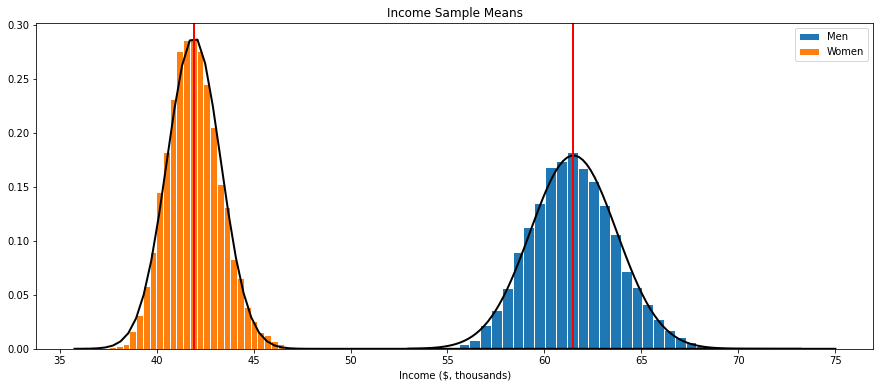

In [42]:
two_hist([men,women],['Men','Women'],'Income ($, thousands)', "Income Sample Means")

In [44]:
w_men=df[(df['sex']==1)&(df['race']==1)]['income']
b_women=df[(df['sex']==2)&(df['race']==2)]['income']